# (Core) Project 1: Global Explanations
Task

    For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

## Load Your Saved Joblib File

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
## Customization Options
pd.set_option("display.max_columns",100)
plt.style.use(['fivethirtyeight','seaborn-talk'])
mpl.rcParams['figure.facecolor']='white'
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics
## fixing random for lesson generation
SEED = 321
np.random.seed(SEED)

C:\Users\tulan\AppData\Local\Temp\ipykernel_35124\730527515.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['fivethirtyeight','seaborn-talk'])


In [6]:
import joblib

In [7]:

loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest', 'LinearRegression'])

In [8]:
X_train = loaded_joblib['X_train']
X_test = loaded_joblib['X_test']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_Forest = loaded_joblib['RandomForest']
loaded_Reg = loaded_joblib['LinearRegression']

## Explain your tree-based model with shap:

In [9]:
## fit random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
loaded_Forest.fit(X_train,y_train)
print(f"Training R^2: {loaded_Forest.score(X_train,y_train):.3f}")
print(f"Test R^2: {loaded_Forest.score(X_test, y_test):.3f}")



Training R^2: 1.000
Test R^2: 0.107


In [10]:
import shap
shap.initjs()

In [14]:
X_shap = shap.sample(X_train, nsamples=200, random_state=321)
X_shap


Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
3888                       0.0                       1.0   
2497                       0.0                       1.0   
7723                       1.0                       0.0   
8117                       1.0                       0.0   
7475                       1.0                       0.0   
...                        ...                       ...   
4033                       1.0                       0.0   
3230                       0.0                       1.0   
2341                       1.0                       0.0   
823                        1.0                       0.0   
6159                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
3888                     0.0               0.0                  0.0   
2497                     0.0               0.0                  0.0   
7723                     0.0               0.0                  0.0   
8117                     0.0               0.0                  0.0   
7475                     0.0               0.0                  0.0   
...                      ...               ...                  ...   
4033                     0.0               0.0                  0.0   
3230                     0.0               0.0                  0.0   
2341                     0.0               0.0                  0.0   
823                      0.0               0.0                  0.0   
6159                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
3888               0.0              0.0                     1.0   
2497               0.0              0.0                     0.0   
7723               0.0              0.0                     0.0   
8117               0.0              0.0                     0.0   
7475               0.0              0.0                     0.0   
...                ...              ...                     ...   
4033               0.0              0.0                     0.0   
3230               0.0              0.0                     0.0   
2341               0.0              0.0                     0.0   
823                0.0              0.0                     0.0   
6159               0.0              1.0                     0.0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
3888                              0.0                    0.0   
2497                              1.0                    0.0   
7723                              1.0                    0.0   
8117                              1.0                    0.0   
7475                              0.0                    0.0   
...                               ...                    ...   
4033                              1.0                    0.0   
3230                              1.0                    0.0   
2341                              0.0                    0.0   
823                               0.0                    0.0   
6159                              0.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
3888                           0.0                  0.0             0.0   
2497                           0.0                  0.0             0.0   
7723                           0.0                  0.0             0.0   
8117                           0.0                  0.0             0.0   
7475                           1.0                  0.0             0.0   
...                            ...                  ...             ...   
4033                           0.0                  0.0             0.0   
3230                           0.0                  0.0             0.0   
2341                           1.0                  0.0             0.0   
823                            0.0                  1.0             0.0   
6159                           0.

In [15]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap


3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
4033    1771.0280
3230    1416.8224
2341    1301.6390
823     1856.2504
6159     697.0926
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [16]:
explainer = shap.Explainer(loaded_Forest)
explainer

In [17]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(200, 31)

## Create a summary plot - with plot_type='bar':

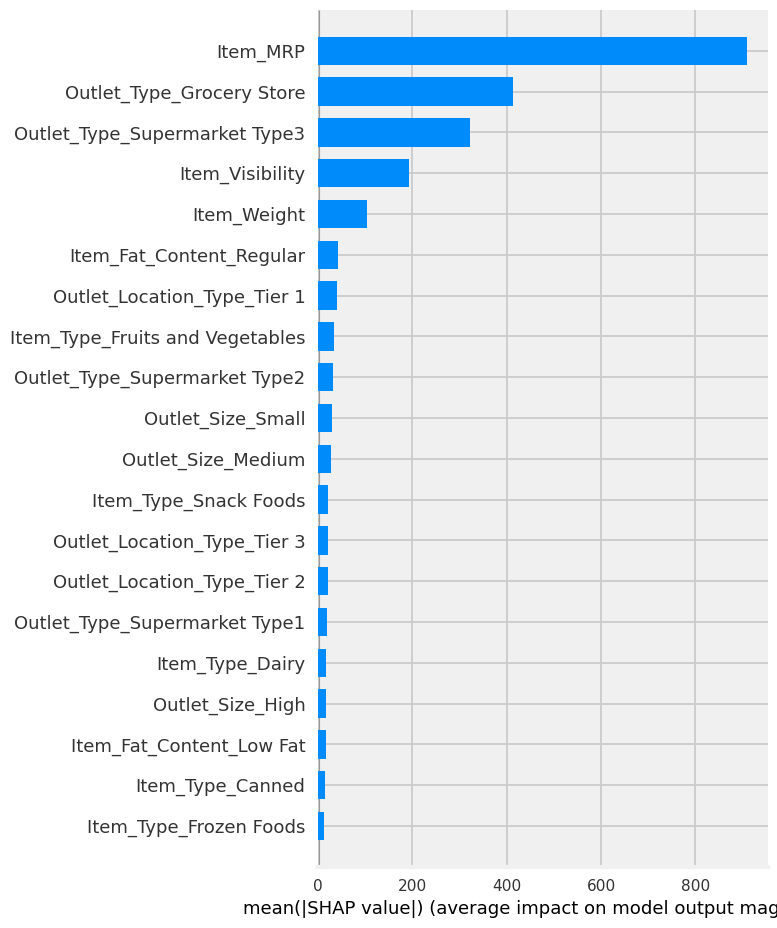

In [18]:
shap.summary_plot(shap_values,X_shap,  plot_type='bar')


### saved feature importance image 

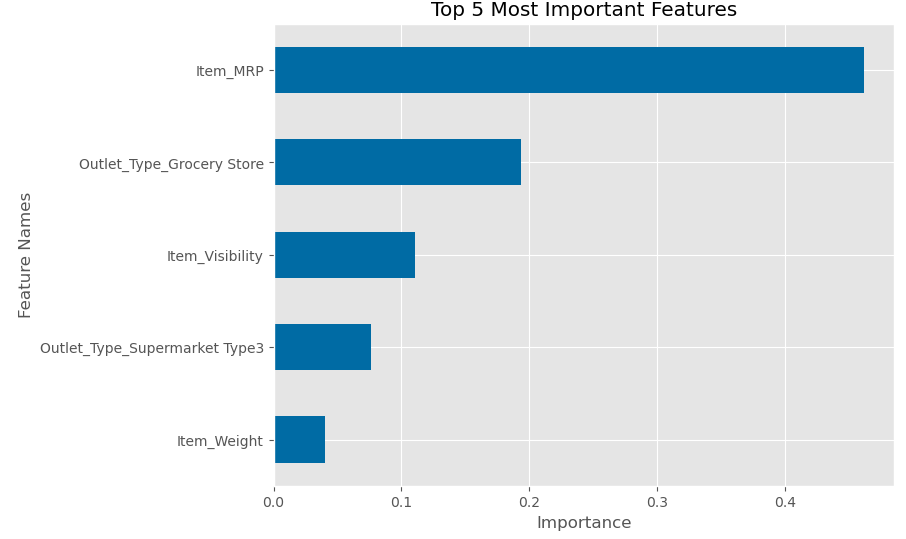

###  Are they the same features in both? If not, what's different?

The values are the same, but the visibility and supermarket type are flipped.

## Create a second summary plot - with plot_type='dot'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


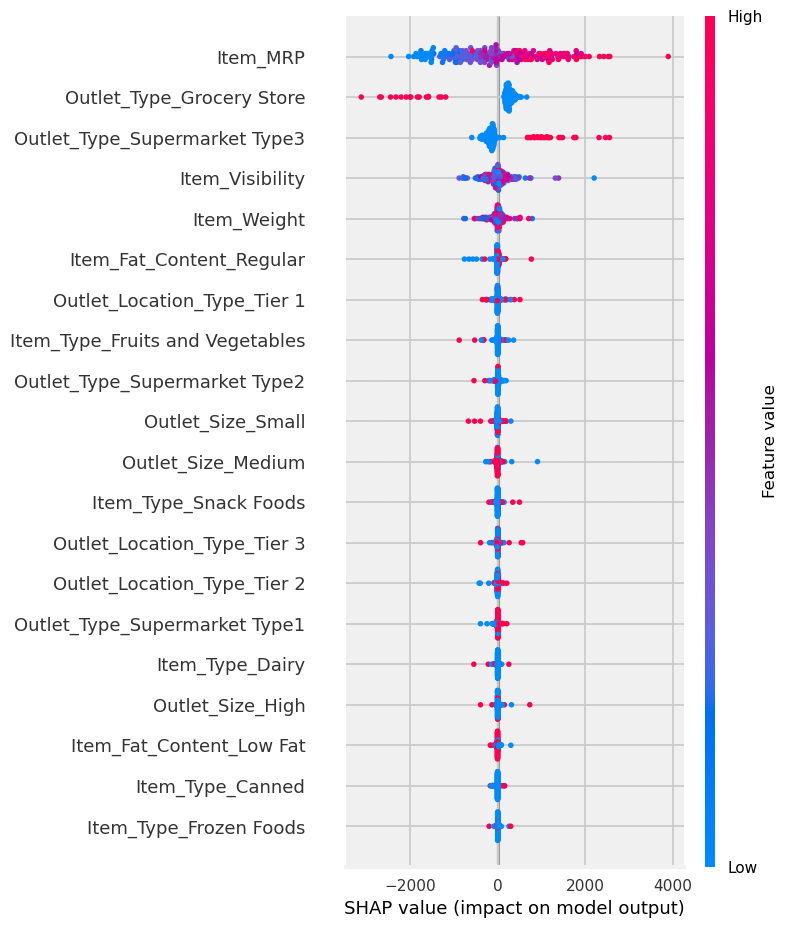

In [19]:
shap.summary_plot(shap_values,X_shap,  plot_type='dot')


### In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.

Item_MRP - The higher this is, the more likely the model is to give a high sale price.

Outlet_Type - the higher this is, the less likely the model is to give a high sale price.

Supermarket type 3 - type 3 Supermarkets tend to be predicted to have higher sale prices. 

# (Core) Project 1: Local Explanations
Task

    For this assignment, you will be revisiting your first project to predict supermarket sales. You will be applying everything you've learned this week to explain how your models made their predictions.

Part 3 - Local Explanations

Continue working in your model explanation notebook from the previous core assignment. Add a new "Local Explanations" header at the bottom and continue your work:

    Select at least 2 example rows/outlets based on the insights gained from your previous core assignments this week. 

    Explain why you selected the examples that you did.
        If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).

    For each example, produce :
        a Lime tabular explanation
            Interpret what features most heavily influenced the predictions, according to LIME.
            Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the lime explanation.
        an Individual Force Plot
            Interpret what features most heavily influenced the predictions, according to SHAP.
            Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the individual force plot.


Update your README.

    Add your explanation for why you selected the individual examples that you visualized.
    For each example (need at least 2 examples)
        A Lime tabular explanation
            Your corresponding interpretation
        A sharp force plot
            Your corresponding interpretation.

## Global force plot

In [20]:
## Global Force Plot 
shap.force_plot(explainer.expected_value, shap_values.values, features=X_shap)



## Select at least 2 example rows/outlets based on the insights gained from your previous core assignments this week. 

In [21]:
# Selecting a row
row = 94
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)


- Row #: 94
- Target: 11445.102


Item_Fat_Content_Low Fat           1.00
Item_Fat_Content_Regular           0.00
Item_Type_Baking Goods             0.00
Item_Type_Breads                   0.00
Item_Type_Breakfast                0.00
Item_Type_Canned                   0.00
Item_Type_Dairy                    0.00
Item_Type_Frozen Foods             0.00
Item_Type_Fruits and Vegetables    1.00
Item_Type_Hard Drinks              0.00
Item_Type_Health and Hygiene       0.00
Item_Type_Household                0.00
Item_Type_Meat                     0.00
Item_Type_Others                   0.00
Item_Type_Seafood                  0.00
Item_Type_Snack Foods              0.00
Item_Type_Soft Drinks              0.00
Item_Type_Starchy Foods            0.00
Outlet_Size_High                   0.00
Outlet_Size_Medium                 1.00
Outlet_Size_Small                  0.00
Outlet_Location_Type_Tier 1        0.00
Outlet_Location_Type_Tier 2        0.00
Outlet_Location_Type_Tier 3        1.00
Outlet_Type_Grocery Store          0.00


In [22]:
# Selecting a row
row = 89
print(f"- Row #: {row}")
print(f"- Target: {y_shap.iloc[row]}")
X_shap.iloc[row].round(2)

- Row #: 89
- Target: 761.0094


Item_Fat_Content_Low Fat           1.00
Item_Fat_Content_Regular           0.00
Item_Type_Baking Goods             0.00
Item_Type_Breads                   0.00
Item_Type_Breakfast                0.00
Item_Type_Canned                   0.00
Item_Type_Dairy                    0.00
Item_Type_Frozen Foods             0.00
Item_Type_Fruits and Vegetables    0.00
Item_Type_Hard Drinks              0.00
Item_Type_Health and Hygiene       0.00
Item_Type_Household                1.00
Item_Type_Meat                     0.00
Item_Type_Others                   0.00
Item_Type_Seafood                  0.00
Item_Type_Snack Foods              0.00
Item_Type_Soft Drinks              0.00
Item_Type_Starchy Foods            0.00
Outlet_Size_High                   0.00
Outlet_Size_Medium                 0.00
Outlet_Size_Small                  1.00
Outlet_Location_Type_Tier 1        1.00
Outlet_Location_Type_Tier 2        0.00
Outlet_Location_Type_Tier 3        0.00
Outlet_Type_Grocery Store          1.00


These targets were chosen as one has a high target value and one has a low target value.

## High value target (sample 94)

### Individual Force Plot

In [23]:
row = 94

In [24]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])



### a Lime tabular explanation 

In [25]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer



In [28]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               loaded_Forest.predict)
exp.show_in_notebook()



X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


## Interpret what features most heavily influenced the predictions

According to both explainations, the outlet not being a grocery store, being supermarket type 3, and a high MRP influenced the predicted value the most, in a positive manner. 

## Low value target (sample =89)

In [29]:
row = 89

###  Individual Force Plot

In [30]:
## Individual forceplot
shap.force_plot(explainer.expected_value,
                shap_values= shap_values[row].values,
               features=X_shap.iloc[row])

### Lime tabular explanation

In [31]:
exp = lime_explainer.explain_instance(X_shap.iloc[row],
                               loaded_Forest.predict)
exp.show_in_notebook()


X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


### Interpret what features most heavily influenced the predictions

The features for this sample was the same as the previous one, except since the outlet was a grocery store and not a supermarket type 3, those values affected the predicted value negatively. MRP was still positive and still a high influence.